In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re # regex

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv


## 1. Load the data

In [3]:
data_train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
data_test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## 2.Check for missing values

In [4]:
print('Size of train data', data_train.shape)
data_train.isnull().sum()

Size of train data (7613, 5)


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
# drop columns: 'keyword', 'location', 'id'
data_train.drop(['keyword', 'location', 'id'], axis=1, inplace=True)
print('Columns {}, {} and {} have been dropped'.format('keyword', 'location', 'id'))

Columns keyword, location and id have been dropped


In [6]:
data_train

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


## 3. Preprocessing of text data

In [7]:
import nltk
from nltk.corpus import stopwords
# to stem derived words from the root word
from nltk.stem.porter import PorterStemmer
import re

### Preprocessing text: Stage 1

In [8]:
stop = set(stopwords.words('english'))
pstem = PorterStemmer()


def stop_stem_lower(tweet):
    try:
        regex = re.compile('[^a-zA-Z]')
        tweet = regex.sub(" ", tweet)
        tweet = tweet.lower()

        # check for stop words and then stem
        #tweet = [pstem.stem(word) for word in tweet.split() if word not in stop and len(word)>2]
        tweet = [pstem.stem(word) for word in tweet.split() if word not in stop]
        # join the words back
        tweet = ' '.join(tweet)
        return tweet
    except:
        return 0

In [9]:
# try on a sample
sample = data_train.sample(frac=0.01, random_state=1)
sample['Cleaned text'] = sample['text'].apply(lambda x: stop_stem_lower(x))
sample

,text,target,Cleaned text
3228,Goulburn man Henry Van Bilsen missing: Emergen...,1,goulburn man henri van bilsen miss emerg servi...
3706,The things we fear most in organizations--fluc...,0,thing fear organ fluctuat disturb imbal primar...
6957,@tsunami_esh ?? hey Esh,0,tsunami esh hey esh
2887,@POTUS you until you drown by water entering t...,0,potu drown water enter lung aliv caus great co...
7464,Crawling in my skin\nThese wounds they will no...,1,crawl skin wound hea
...,...,...,...
299,The latest from @BryanSinger reveals #Storm is...,1,latest bryansing reveal storm queen apocalyps ...
1873,sevenfigz has a crush: http://t.co/20B3PnQxMD,1,sevenfigz crush http co b pnqxmd
1660,Look: #I have collapsed #after attempting to m...,0,look collaps attempt munch endang speci
6929,why is it trouble@niallhariss / @simply_vain l...,0,troubl niallhariss simpli vain live http co ia...


In [10]:
# apply stop_stem_lower(tweet) on the entire train
temp = pd.DataFrame()

# changing the width of the column
pd.set_option('display.max_colwidth', 100)

import time
start= time.time()
temp['original text'] = data_train['text'].copy()
temp['cleaned_text'] = data_train['text'].apply(lambda x: stop_stem_lower(x))
print('time taken: ', time.time() - start)
temp.head(10)

time taken:  3.455626964569092


,original text,cleaned_text
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,deed reason earthquak may allah forgiv us
1,Forest fire near La Ronge Sask. Canada,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,resid ask shelter place notifi offic evacu shelter place order expect
3,"13,000 people receive #wildfires evacuation orders in California",peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,got sent photo rubi alaska smoke wildfir pour school
5,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAf...,rockyfir updat california hwi close direct due lake counti fire cafir wildfir
6,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",flood disast heavi rain caus flash flood street manit colorado spring area
7,I'm on top of the hill and I can see a fire in the woods...,top hill see fire wood
8,There's an emergency evacuation happening now in the building across the street,emerg evacu happen build across street
9,I'm afraid that the tornado is coming to our area...,afraid tornado come area


In [11]:
# to store the cleaned text
# to use in the next stage for data preprocessing

corpus = temp['cleaned_text'].values.tolist()
print(corpus[:10])
del temp

['deed reason earthquak may allah forgiv us', 'forest fire near la rong sask canada', 'resid ask shelter place notifi offic evacu shelter place order expect', 'peopl receiv wildfir evacu order california', 'got sent photo rubi alaska smoke wildfir pour school', 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir', 'flood disast heavi rain caus flash flood street manit colorado spring area', 'top hill see fire wood', 'emerg evacu happen build across street', 'afraid tornado come area']


### Preprocessing text: Stage 2
* **Check for words that are occur very less in our tweets**
* **They should be removed from our Bag of words to reduce dimensionality**


### 2.1 Using CountVectorizer

### CountVectorizer does the following by default:
- lowercases your text (set lowercase=false if you don’t want lowercasing)
- uses utf-8 encoding
- performs tokenization (converts raw text to smaller units of text)
- uses word level tokenization (meaning each word is treated as a separate token)
- ignores single characters during tokenization (say goodbye to words like ‘a’ and ‘I’)

In [12]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(stop_words='english') # the stop words were already removed, but i am just adding the paramater here

start = time.time()
cvect_fit = cvect.fit_transform(corpus) # this return a 'scipy.sparse.csr.csr_matrix' (Compressed Sparsed row matrix)
print(type(cvect_fit))
print('Shape of the CSR matrix after the fit and transform method: ', cvect_fit.shape)
print('Number of documents in the train corpus: ', data_train.shape[0])
print('time taken for CountVectorizer on the cleaned corpus is', time.time() - start)

<class 'scipy.sparse.csr.csr_matrix'>
Shape of the CSR matrix after the fit and transform method:  (7613, 18739)
Number of documents in the train corpus:  7613
time taken for CountVectorizer on the cleaned corpus is 0.2507059574127197


### Each row in the CSR matrix represents a document and each column is a feature or a word
- **Each column entry is the count for that feature in that document**

### CountVectorizer methods:
- After CountVectorizer has been fit on the corpus:
    - CountVectorizer().vocabulary_ : returns the unique words and their positions in the sparse CSR matrix
    - CountVectorizer().get_feature_names() : will list all the features or unique words
    - CountVectorizer().fit_transform(corpus).toarray(): converts the sparse matrix into an array, where each row is a document in the corpus and each column entry is the occurence of the word in the document
    - CountVectorizer().fit_transform(corpus).sum(axis=0): returns the frequency of the words/features in the entire corpus. Shape: (1 X number of features)

In [13]:
# the numbers are not 'counts', but the positions in the sparse vector
display(cvect.vocabulary_)

word_freq_csr = cvect_fit.sum(axis=0) # get the row wise sum of the frequencies of each feature/words across all the documents

{'deed': 3525,
 'reason': 13115,
 'earthquak': 4284,
 'allah': 389,
 'forgiv': 5410,
 'forest': 5404,
 'near': 10686,
 'la': 8797,
 'rong': 13605,
 'sask': 13938,
 'canada': 2118,
 'resid': 13296,
 'ask': 788,
 'shelter': 14290,
 'place': 12132,
 'notifi': 10995,
 'offic': 11267,
 'evacu': 4783,
 'order': 11512,
 'expect': 4858,
 'peopl': 11917,
 'receiv': 13131,
 'wildfir': 17530,
 'california': 2085,
 'got': 6117,
 'sent': 14157,
 'photo': 12026,
 'rubi': 13728,
 'alaska': 343,
 'smoke': 14606,
 'pour': 12310,
 'school': 14011,
 'rockyfir': 13560,
 'updat': 16649,
 'hwi': 7111,
 'close': 2674,
 'direct': 3774,
 'lake': 8824,
 'counti': 3011,
 'cafir': 2058,
 'flood': 5308,
 'disast': 3789,
 'heavi': 6621,
 'rain': 12983,
 'caus': 2250,
 'flash': 5274,
 'street': 15093,
 'manit': 9623,
 'colorado': 2800,
 'spring': 14863,
 'area': 686,
 'hill': 6754,
 'wood': 17669,
 'emerg': 4520,
 'happen': 6476,
 'build': 1919,
 'afraid': 201,
 'tornado': 16002,
 'come': 2817,
 'die': 3739,
 'heat'

In [14]:
# word frequency
# the number here indicates the actual frequency of the word in the entire corpus of documents
word_freq = [(word, word_freq_csr[0, indx]) for word, indx in cvect.vocabulary_.items()]

### Finding the most frequent words

In [15]:
word_freq_sorted = sorted(word_freq, key = lambda x: x[1], reverse=True)
# the 10 most frequent words
word_freq_sorted[:10]

[('http', 4721),
 ('like', 411),
 ('amp', 344),
 ('bomb', 239),
 ('new', 228),
 ('news', 213),
 ('peopl', 201),
 ('time', 183),
 ('kill', 181),
 ('burn', 180)]

### 2.2 Using Counter to count the number of frequent words
- Ref: https://stackoverflow.com/questions/27488446/how-do-i-get-word-frequency-in-a-corpus-using-scikit-learn-countvectorizer

In [16]:
corpus[:10]

['deed reason earthquak may allah forgiv us',
 'forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 'peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour school',
 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir',
 'flood disast heavi rain caus flash flood street manit colorado spring area',
 'top hill see fire wood',
 'emerg evacu happen build across street',
 'afraid tornado come area']

### Split the words in seach sentence and add them to a list, so that we can apply the Counter()

In [17]:
## Sample

temp=[]
for sent in corpus[:10]:
    [temp.append(w) for w in sent.split()]
    
print(temp)

['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'us', 'forest', 'fire', 'near', 'la', 'rong', 'sask', 'canada', 'resid', 'ask', 'shelter', 'place', 'notifi', 'offic', 'evacu', 'shelter', 'place', 'order', 'expect', 'peopl', 'receiv', 'wildfir', 'evacu', 'order', 'california', 'got', 'sent', 'photo', 'rubi', 'alaska', 'smoke', 'wildfir', 'pour', 'school', 'rockyfir', 'updat', 'california', 'hwi', 'close', 'direct', 'due', 'lake', 'counti', 'fire', 'cafir', 'wildfir', 'flood', 'disast', 'heavi', 'rain', 'caus', 'flash', 'flood', 'street', 'manit', 'colorado', 'spring', 'area', 'top', 'hill', 'see', 'fire', 'wood', 'emerg', 'evacu', 'happen', 'build', 'across', 'street', 'afraid', 'tornado', 'come', 'area']


In [18]:
# for the entire train corpus
temp_counter= []

for sent in corpus:
    [temp_counter.append(w) for w in sent.split()]
    
#print(temp_counter)
print('Number of words in the corpus is :', len(temp_counter))

Number of words in the corpus is : 88103


### Using the Counter function

### Using the Counter function: Method 1

In [19]:
# On a sample

from collections import Counter
Counter(temp).most_common(10)

[('fire', 3),
 ('evacu', 3),
 ('wildfir', 3),
 ('shelter', 2),
 ('place', 2),
 ('order', 2),
 ('california', 2),
 ('flood', 2),
 ('street', 2),
 ('area', 2)]

In [20]:
# on the complete train
# temp_counter has the complete list

Counter(temp_counter).most_common(10)

[('co', 4746),
 ('http', 4721),
 ('like', 411),
 ('fire', 363),
 ('amp', 344),
 ('get', 311),
 ('bomb', 239),
 ('new', 228),
 ('via', 220),
 ('u', 216)]

### Using the Counter function: Method 2

In [21]:
# On a sample

counter = Counter()
counter.update(temp)
counter.most_common(10)

[('fire', 3),
 ('evacu', 3),
 ('wildfir', 3),
 ('shelter', 2),
 ('place', 2),
 ('order', 2),
 ('california', 2),
 ('flood', 2),
 ('street', 2),
 ('area', 2)]

In [22]:
# on the complete train
# temp_counter has the complete list

counter.update(temp_counter)
counter.most_common(10)

[('co', 4746),
 ('http', 4721),
 ('like', 411),
 ('fire', 366),
 ('amp', 344),
 ('get', 311),
 ('bomb', 239),
 ('new', 228),
 ('via', 220),
 ('u', 216)]

### 2.3 Word frequency using custom code or function

In [29]:
WordFrequency=dict()
for sent in corpus:
    for word in sent.split():
        if word in WordFrequency.keys():
            WordFrequency[word]+=1
        else:
            WordFrequency[word]=1
            

# convert dictionary to DataFrame
WordFrequency_df = pd.DataFrame(WordFrequency.items(), columns=['word', 'frequency'])
WordFrequency_df.sort_values('frequency', ascending=False).head(10)

,word,frequency
123,co,4746
122,http,4721
115,like,411
8,fire,363
341,amp,344
74,get,311
2089,bomb,239
155,new,228
784,via,220
256,u,216


### 2.3.1 From the list of words, consider removing some words or features to reduce dimensions:
    - There are some words like 'co' and 'http' which doesn not add any valuable information
    - There are also other words like 'via', 'u, which could also have been removed in the intial regex compilaton for selecting words that have a minimal length of 3
    - Also we should consider removing words that are very rare as they do not add any value

In [31]:
WordFrequency_df.sort_values('frequency', ascending=True)

,word,frequency
18888,rskq,1
8913,gbvdnczjou,1
8914,hise,1
8915,dy,1
8916,ersdcrh,1
8917,cpmxmurk,1
8918,delphi,1
8919,lmrkgporcf,1
8920,wadnmstov,1
8921,bsmj,1


### 2.3.2 ** from the histogram plot, there are more than 13K words which have a frequency of 1 **

(array([    0., 13094.,  1754.,   835.,   550.,   419.,   291.,   212.,
          186.,   222.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

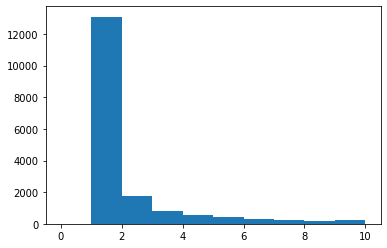

In [36]:
plt.hist(WordFrequency_df['frequency'], range=(0,10))

In [33]:
?plt.hist

### ** More than 69% of the words in the entire train corpus have a word frequency of only 1 **

In [40]:
# verifying the results
display(WordFrequency_df['frequency'].value_counts()[:10])

# to see the results in percentages
display(WordFrequency_df['frequency'].value_counts(normalize=True)[:10])

1     13094
2      1754
3       835
4       550
5       419
6       291
7       212
8       186
9       138
11       86
Name: frequency, dtype: int64

1     0.693208
2     0.092858
3     0.044206
4     0.029117
5     0.022182
6     0.015406
7     0.011223
8     0.009847
9     0.007306
11    0.004553
Name: frequency, dtype: float64

In [42]:
WordFrequency_df[WordFrequency_df['frequency'] == 1]['word'][:100]

11          rong
12          sask
18        notifi
51         manit
80          fvck
         ...    
445          mir
446      congest
447       pastor
454        spilt
455    mayonnais
Name: word, Length: 100, dtype: object

In [44]:
from nltk.corpus import words as nltk_words

In [50]:
nltk_words.words()[:10]

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron']

### Check if words with frequency: 1 are valid English words as per English dictionary and if they can be found from the NLTK corpus

In [55]:
start = time.time()
freq1 = WordFrequency_df[WordFrequency_df['frequency'] == 1]['word'].values.tolist()
valid_words_freq1 = [w for w in freq1 if w in nltk_words.words()]
print('time taken to find valid words with a frequency of 1 is', time.time() - start)
print('Number of valid words with a frequency of 1 is', len(valid_words_freq1))

time taken to find valid words with a frequency of 1 is 1677.8927783966064
Number of valid words with a frequency of 1 is 1623


In [56]:
valid_words_freq1

['preach',
 'retain',
 'gunner',
 'tambo',
 'pen',
 'tinderbox',
 'ramp',
 'mir',
 'congest',
 'pastor',
 'spilt',
 'median',
 'halfway',
 'foreman',
 'harder',
 'clay',
 'pigeon',
 'disclaim',
 'silverwood',
 'interrupt',
 'oyster',
 'fletcher',
 'statist',
 'shrew',
 'clot',
 'minimum',
 'wage',
 'kiwi',
 'clinic',
 'tyt',
 'kneel',
 'sundown',
 'careen',
 'toenail',
 'symbol',
 'peninsula',
 'astonish',
 'fant',
 'grind',
 'forthright',
 'coma',
 'kebab',
 'simmon',
 'quarterstaff',
 'contributor',
 'nova',
 'adapt',
 'interpret',
 'geek',
 'coif',
 'faction',
 'hao',
 'goof',
 'guild',
 'doomsday',
 'gog',
 'patron',
 'prove',
 'begun',
 'reconnect',
 'dial',
 'hep',
 'mop',
 'felon',
 'brig',
 'gen',
 'kaiser',
 'mattress',
 'sought',
 'spotlight',
 'cube',
 'zodiac',
 'trey',
 'chuck',
 'ust',
 'mink',
 'earl',
 'plead',
 'relay',
 'tact',
 'assail',
 'secondhand',
 'vita',
 'frail',
 'scholar',
 'rival',
 'looser',
 'wynn',
 'wrote',
 'mint',
 'gyp',
 'preseason',
 'ordain',
 's

In [57]:
# save the contents of this list for later use
# since the search is extensive from the previous cell: output as below
# time taken to find valid words with a frequency of 1 is 1677.8927783966064 seconds
# Number of valid words with a frequency of 1 is 1623

import pickle
pickle.dump(valid_words_freq1, open('valid_words_freq1.pkl', 'wb'))

### 2.3.3  For the below code, I will consider only those words that have frequency of > 20

In [77]:
WordFrequency_df20 = WordFrequency_df[WordFrequency_df['frequency'] >= 20]
print(WordFrequency_df20.shape)

(787, 2)


In [78]:
WordFrequency_df20.sort_values('frequency', inplace=True, ascending=False)
WordFrequency_df20.set_index('word', inplace=True)
WordFrequency_df20

,frequency
word,
co,4746
http,4721
like,411
fire,363
amp,344
...,...
beach,20
arriv,20
pilot,20


## 3. Create a Bag of words, using a sparse matrix
- Use a CountVectorizer, with max_features = number of unique words

In [81]:
countVec = CountVectorizer(max_features=WordFrequency_df20.shape[0])
start = time.time()
countVec_fit = countVec.fit_transform(corpus)
print('time taken:', time.time() - start)

time taken: 0.24408268928527832


In [85]:
countVec_fit

<7613x787 sparse matrix of type '<class 'numpy.int64'>'
	with 45346 stored elements in Compressed Sparse Row format>

### To view the contents of the CSR matrix, use either:
 - ** toarray() method **
 - ** todense() method **

In [95]:
display(countVec_fit.toarray()), display(countVec_fit.todense())
bagOfwords = countVec_fit.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]])

## 4. Machine Models

In [96]:
X = bagOfwords
y = data_train['target']

In [98]:
from sklearn.model_selection import cross_val_score

### 4.1 Decision Tree Model

In [109]:
from sklearn.tree import DecisionTreeClassifier

#dt = DecisionTreeClassifier(max_depth= 10, min_samples_split=10)
start = time.time()
dt = DecisionTreeClassifier()
dt_f1_scores = cross_val_score(dt, X, y, cv=5, scoring='f1')
dt_roc_auc_scores = cross_val_score(dt, X, y, cv=5, scoring='roc_auc')
print('Time take for DecisionTreeClassifier is: ', time.time() - start)
print('Mean f1 score for DecisionTreeClassifier is: ', dt_f1_scores.mean())
print('Mean roc_auc_score for DecisionTreeClassifier is: ', dt_roc_auc_scores.mean())

Time take for DecisionTreeClassifier is:  30.27559757232666
Mean f1 score is:  0.5376555931910773
Mean roc_auc_score is:  0.5979259157708822


In [92]:
# to view the parameters
?DecisionTreeClassifier

### 4.2 Gradient Boosting model

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc_f1_scores = cross_val_score(gbc, X, y, cv=5, scoring='f1')
gbc_roc_auc_scores = cross_val_score(gbc, X, y, cv=5, scoring='roc_auc')
print('Time take for GradientBoostingClassifier is: ', time.time() - start)
print('Mean f1 score for GradientBoostingClassifier is: ', gbc_f1_scores.mean())
print('Mean roc_auc_score for GradientBoostingClassifier is: ', gbc_roc_auc_scores.mean())

Time take for GradientBoostingClassifier is:  72.46379160881042
Mean f1 score is:  0.53584878296336
Mean roc_auc_score is:  0.6060133970861922


In [108]:
?GradientBoostingClassifier

### 4.3 K-Nearest Neighbors Classifier(KNN)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_f1_scores = cross_val_score(knn, X, y, cv=5, scoring='f1')
knn_roc_auc_scores = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')
print('Time take for KNeighborsClassifier is: ', time.time() - start)
print('Mean f1 score for KNeighborsClassifier is: ', knn_f1_scores.mean())
print('Mean roc_auc_score for KNeighborsClassifier is: ', knn_roc_auc_scores.mean())

In [112]:
?KNeighborsClassifier